In [ ]:
%pip install seaborn latex

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd

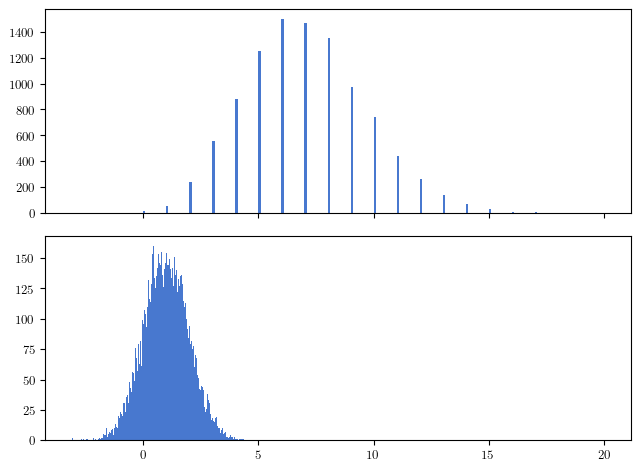

In [2]:
plt.style.use("seaborn-v0_8-muted")
def set_size(width_pt=472.31595, fraction=1, subplots=(1, 1)):
    """Set figure dimensions nicely

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5 ** .5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return fig_width_in, fig_height_in

# Colormap with University colors
colors = ["white", "#005f9b", "#153268"]
nodes = [0.0, 0.8, 1.0]
unimap = matplotlib.colors.LinearSegmentedColormap.from_list("unimap", list(zip(nodes, colors)))
unimap_r = unimap.reversed()
try:
    matplotlib.colormaps.register(cmap=unimap)
    matplotlib.colormaps.register(cmap=unimap_r)
except ValueError:
    pass

# LaTeX text renderer
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "font.serif": "Computer Modern Roman",
    "text.usetex": True,  # use inline math for ticks
    "text.latex.preamble": r"\usepackage{amsmath}",
    "pgf.rcfonts": False,  # don't setup fonts from rc parameters
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10.95,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    # Cmap
    "image.cmap": "unimap"
})
 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=set_size(fraction=1, subplots=(1.2, 1)), sharex=True)

ax1.hist(np.random.poisson(7, 10000), bins=200)
ax2.hist(np.random.normal(1, 1, 10000), bins=200)

plt.tight_layout()
plt.show()
fig.savefig('style.pdf', format='pdf', bbox_inches='tight', dpi=300)

In [3]:
import os

In [4]:
withs = []

for fname in os.listdir("effects/dic/with/"):
    withs.append(list(pd.read_csv("effects/dic/with/"+fname)["LNK"]))

withouts = []

for fname in os.listdir("effects/dic/without/"):
    withouts.append(list(pd.read_csv("effects/dic/without/"+fname)["LNK"]))

In [15]:
_withs = [[x if 0.0 < x < 998.0 else None for x in l] for l in withs]
_withouts = [[x if 0.0 < x < 998.0 else None for x in l ] for l in withouts]

In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['axes.prop_cycle'] = mpl.cycler(color=mpl.cm.Set2(range(8)))

/tmp/ipykernel_220158/2339148826.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap('Set2')


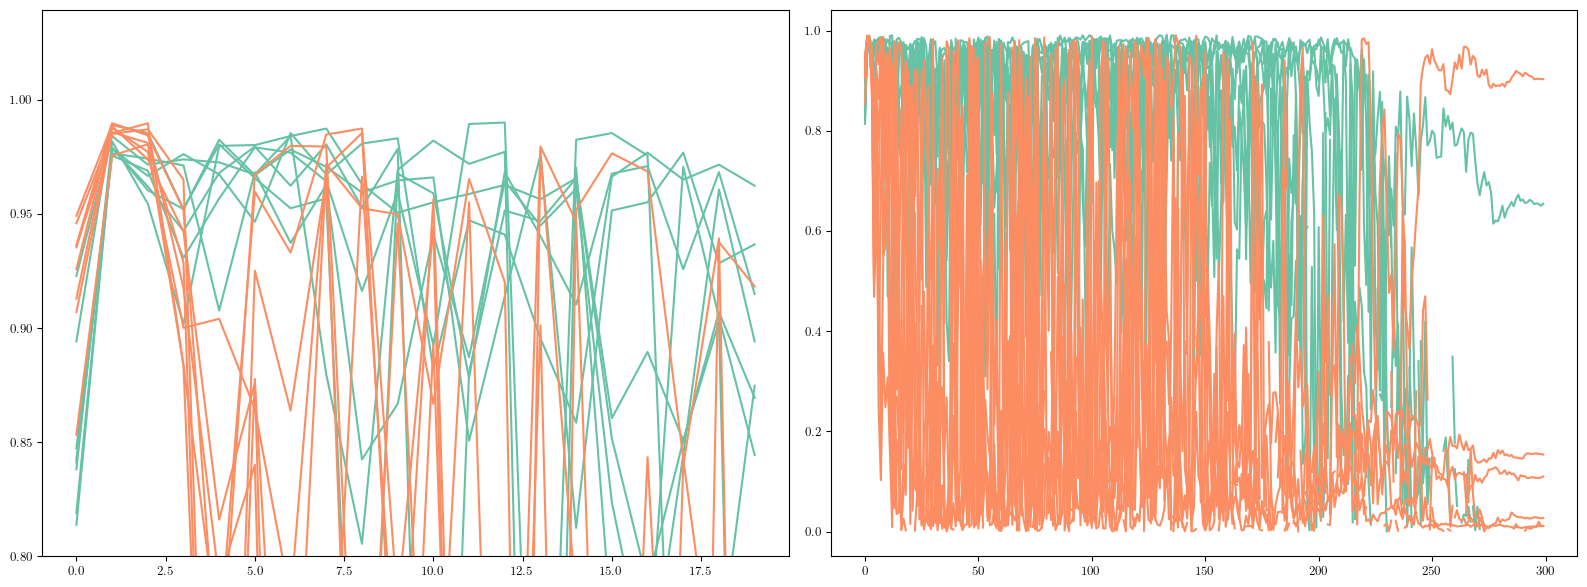

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(1,2, figsize=(16,6))

cmap = mpl.cm.get_cmap('Set2')
num_colors = len(withs) + len(withouts)

colors = [cmap(i / num_colors) for i in range(num_colors)]
ca = colors[0]
cb = colors[2]

for s in _withs:
    ax.flat[0].plot(s[:20], color=ca)

for s in _withouts:
    ax.flat[0].plot(s[:20], color=cb)


ax.flat[0].set_ylim(bottom=0.8)

for s in _withs:
    ax.flat[1].plot(s[:], color=ca)

for s in _withouts:
    ax.flat[1].plot(s[:], color=cb)
    


#ax.flat[1].set_ylim(bottom=0.80)

fig.tight_layout()
plt.savefig("embeddings_effect_dic_rough.pdf")


In [18]:
[len(x) for x in _withouts]

[300, 300, 300, 300, 300, 300, 300, 300]

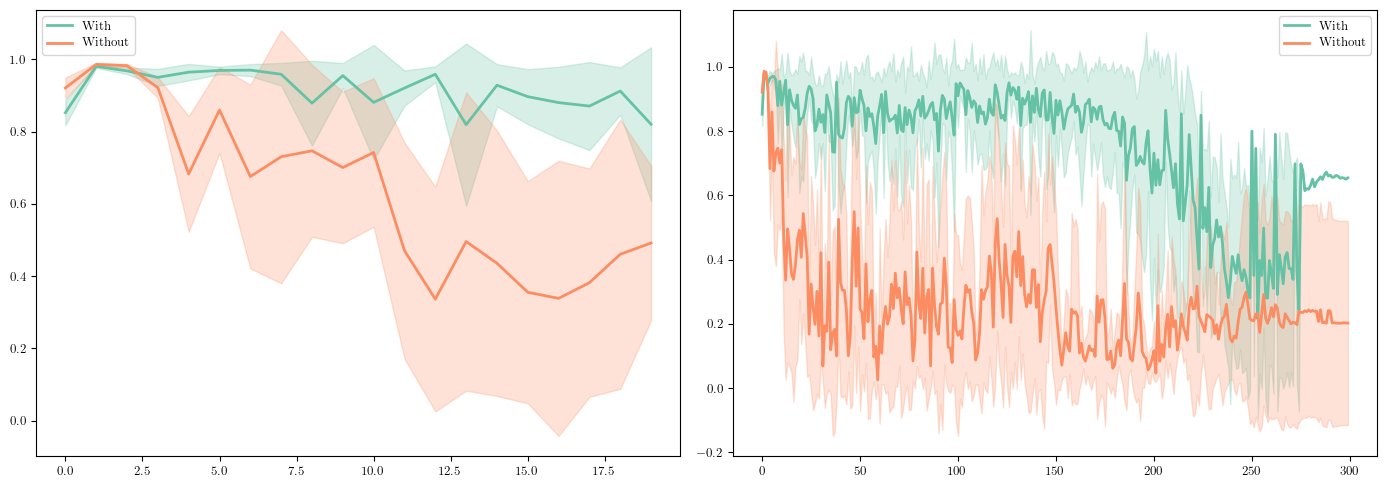

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_mean_shaded(ax, data, color, label, maxlen=None):
    # determine length of sequences to use
    if maxlen is None:
        L = max(len(d) for d in data)
    else:
        L = min(maxlen, max(len(d) for d in data))

    # create 2D array filled with NaNs
    arr = np.full((len(data), L), np.nan, dtype=float)

    # copy data in, converting None -> NaN and padding short sequences
    for i, seq in enumerate(data):
        for j, v in enumerate(seq[:L]):
            if v is None:
                arr[i, j] = np.nan
            else:
                arr[i, j] = v

    # compute stats ignoring NaNs
    mean = np.nanmean(arr, axis=0)
    std  = np.nanstd(arr, axis=0)

    x = np.arange(L)
    ax.plot(x, mean, color=color, label=label, linewidth=2)
    ax.fill_between(x, mean - std, mean + std, color=color, alpha=0.25)

# Example usage with your plotting code:

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

cmap = mpl.colormaps['Set2']
ca, cb = cmap(0), cmap(1)

# left: zoomed (first 20)
plot_mean_shaded(ax[0], _withs,   ca, "With",    maxlen=20)
plot_mean_shaded(ax[0], _withouts, cb, "Without", maxlen=20)
ax[0].legend()

# right: entire sequence
plot_mean_shaded(ax[1], _withs,   ca, "With")
plot_mean_shaded(ax[1], _withouts, cb, "Without")
ax[1].legend()

fig.tight_layout()
plt.savefig("embeddings_effect_dic_aggregated.pdf")


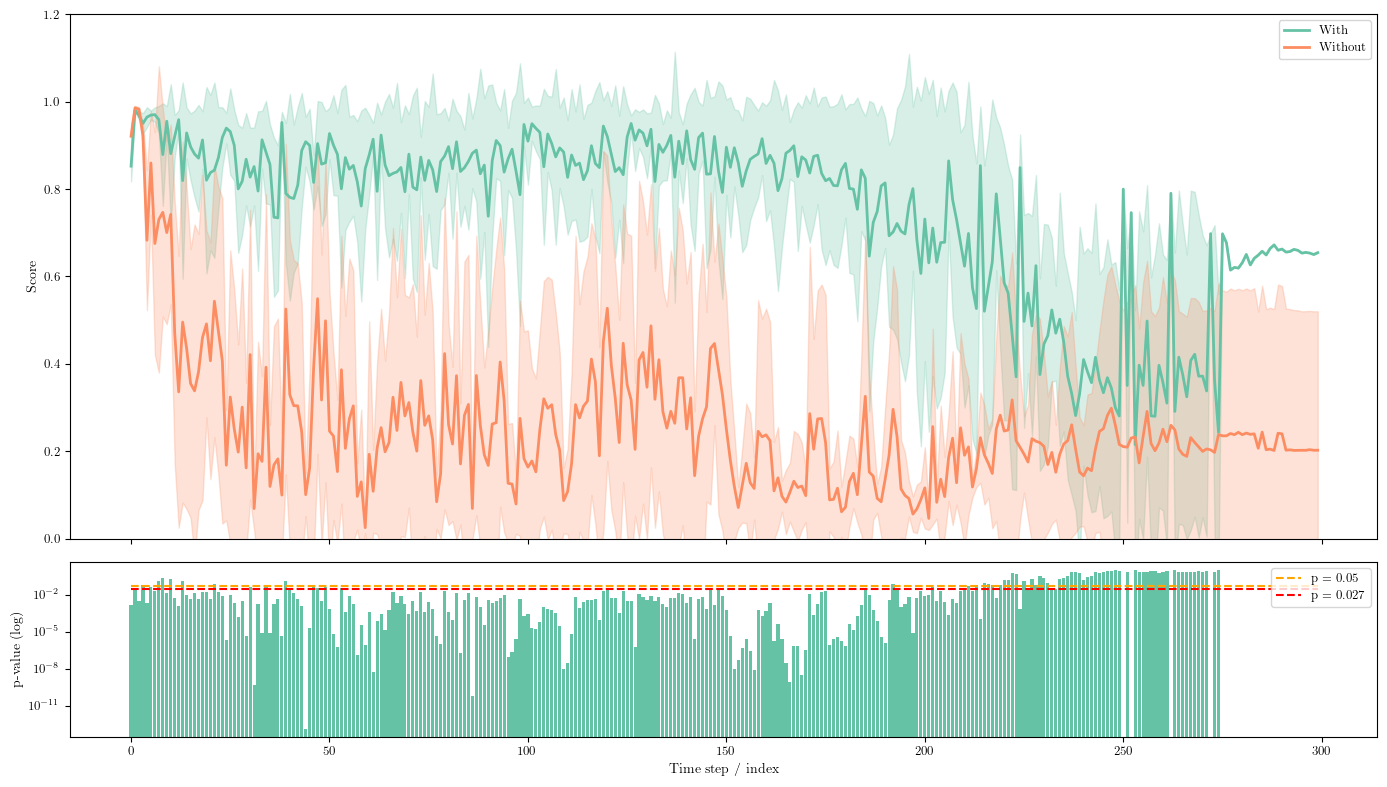

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats

# ---------------------------------------------------------
# Assumes you already have:
#   withs    : list of sequences (same length), may contain None
#   withouts : list of sequences (same length), may contain None
# ---------------------------------------------------------

# === colors & helper ===
cmap = mpl.colormaps['Set2']
ca, cb = cmap(0), cmap(1)


def plot_mean_shaded(ax, data, color, label, maxlen=None):
    """
    Plot mean ± std band over time, ignoring None values.

    data:   iterable of sequences, all same length
    color:  matplotlib color
    label:  legend label
    maxlen: optionally truncate sequences to this length
    """
    cleaned = []
    for seq in data:
        if maxlen is not None:
            seq = seq[:maxlen]
        # Replace None with np.nan so we can use nanmean/nanstd
        cleaned.append([np.nan if v is None else v for v in seq])

    arr = np.array(cleaned, dtype=float)

    # nan-aware statistics
    mean = np.nanmean(arr, axis=0)
    std  = np.nanstd(arr, axis=0)

    x = np.arange(len(mean))
    ax.plot(x, mean, color=color, label=label, linewidth=2)
    ax.fill_between(x, mean - std, mean + std, color=color, alpha=0.25)


# === compute p-values, ignoring None / NaN ===
# assume all sequences in withs / withouts have same length
n_steps = len(withs[0])
pvals = []

for idx in range(n_steps):
    # Take the idx-th element of each sequence
    w_raw  = [seq[idx] for seq in _withs]
    wo_raw = [seq[idx] for seq in _withouts]

    # Convert None -> np.nan
    w  = np.array([np.nan if v is None else v for v in w_raw], dtype=float)
    wo = np.array([np.nan if v is None else v for v in wo_raw], dtype=float)

    # If one group is all NaN, we can't do a test -> pval = NaN
    if np.all(np.isnan(w)) or np.all(np.isnan(wo)):
        pvals.append(np.nan)
        continue

    # t-test ignoring NaNs
    res = stats.ttest_ind(w, wo, equal_var=False, nan_policy='omit')
    pvals.append(res.pvalue)

pvals = np.array(pvals, dtype=float)
x = np.arange(len(pvals))


# === combined figure: top = full plot, bottom = significance ===
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1, figsize=(14, 8),
    sharex=True,
    gridspec_kw={'height_ratios': [3, 1]}
)

# --- TOP: full sequence ---
plot_mean_shaded(ax_top, _withs,    ca, "With")
plot_mean_shaded(ax_top, _withouts, cb, "Without")
ax_top.set_ylim(0.0, 1.2)     # adjust to your data
ax_top.set_ylabel("Score")    # adjust to your metric name
ax_top.legend()

# --- BOTTOM: p-values over time ---
ax_bottom.bar(x, pvals)
ax_bottom.set_yscale('log')

# horizontal lines for thresholds (only where x is defined)
xmin, xmax = x.min(), x.max()
ax_bottom.hlines(0.05,  xmin, xmax, color='orange', linestyle='--', label='p = 0.05')
ax_bottom.hlines(0.027, xmin, xmax, color='red',    linestyle='--', label='p = 0.027')  # example threshold

ax_bottom.set_ylabel("p-value (log)")
ax_bottom.set_xlabel("Time step / index")
ax_bottom.legend(loc="upper right")

fig.tight_layout()
plt.savefig("dic_with_without_plus_significance.pdf", bbox_inches='tight')
plt.show()
